# **Python ile Veri Görselleştirme**
* Veri görselleştirmek için kullanılan en yaygın kütüphaneler:
  > * **Matplotlib:** Python veri görselleştirme dünyasının **büyükbabasıdır.** Çok güçlüdür ama biraz karmaşıktır, Low-Level erişim sağlar yani yapılmak istenen işlemi ifade etmek için daha fazla çaba anlamına gelir. Diğer kütüphaneler Matplotlib'in üzerine inşa edilmiştir. <br>
  > * **Pandas:** Pandas'ı veri analizi için kullanmıştık yine aynı şekilde veri görselleştirmek içinde çok zengin bir içerik barındırır. Matplotlib üzerine inşa edilmiştir. High-Level API sahibidir. <br>
  > * **Seaborn:** Yine Pandas gibi Matplotlib üzerine inşa edilmitir ve yine High-Level interface sunmaktadır. <br>
  > * **ggplot:** Aslında R dünyasında var olan bir kütüphanedir ve bu Python'a uyarlanmış halidir. Kişisel düşünce olarak; veri görselleştirmede dünyanın en iyi araçlarıdan birisidir. High-Level inteface sağlamaktadır. Görselleştirme işlemini 'Katmanlaştırma' mantığıyla ele almaktadır. <br>
  > * **Bokeh:**  Matplotlib üzerine kurulu **değildir.** Interactive bir görselleştirme kütüphanesidir, büyük veri setleri ve akan veri setlerini  yüksek performaslı olarak interactive şekilde sunabilmektedir. <br>
  > * **Plot.ly:** Veri görselleştirme alanına sonradan girmesine rağmen birçok programlama dili ile beraber çalışabilmesinden dolayı güzel imkanlar sunmaktadır. Yine Bokeh gibi interactive veri görselleştimeyi sağlar.
  >
* Biz daha çok **'Seaborn'** kütüphanesini bazen Pandas bazen de Matplotlib kütüphanelerinden de destek alarak kullanacağız 

<hr style="border: 1px solid red;">

## **Veriye İlk Bakış**
* **1) Elimizdeki veri setinin hikayesi nedir?**
  > Elimizdeki veri setinin adı 'Planets'dir. Nasa tarafından galaksi keşfi ile alakalı bir veri setidir.
  >> method: Gezegenlerin bulunma şekli <br>
     number: Bulunan sistemlerdeki gezegen sayısı <br>
     orbital_period: Yörünge dönemini ifade eden teknik bir ifadedir <br>
     mass: Kütle <br>
     distance: Uzaklık <br>
     year: Keşfedilme tarihi <br>

* **2) Ana veri setinin bir kopyasını almak**
  > df = planets.copy()

* **3) Veri setinin yapısal bilgileri**
  > * df.info()
  >> Eğer 'object' görüyorsak bunu Kategorik bir değişken olarak düşüneceğiz. <br>
  >> Değişkenlerin(kolonların) türlerin 'df.dtypes' yazarak da olaşabiliriz

  > * 'object' yazan Kategorik değişkenleri, Kategorik olarak tanımla:
  >> df.method = pd.Categorical(df.method)
  >>> Gelişmiş fonksiyonlar, bunu biz yapmasak da Categorik bir değişken olduğunu anlıyor ama bazıları String muamelesi yapabiliyor. Biz object yazanları kategorik olarak tanımladıktan sonra df.info() yazarsak; eskiden object yazan yerde 'category' yazacağını göreceğiz.

* ****

In [42]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

df = planets.copy()
#df.info()

import pandas as pd
df.method = pd.Categorical(df.method)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


<hr style="border: 1px solid red;">

## **Veri Setinin Betimlenmesi**
* Sayır ve sütun sayısını kontrolü:
  > df.shape
* Sadece değişken isimlerine erişmek istersek:
  > df.columns
* Veri setinin betimsel istatikleri:
  > df.describe().T
  >> **Eksik gözlemleri** göz ardı eder ve **kategorik değişkenleri** dışarıda bırakır.
  >>> İstersek 'df.describe(include = "all").T' yazarak eksik ve kategorik değerleri de içeren bilgiler verir ama anlamsız olur


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


<hr style="border: 1px solid blue;">

### **Eksik Değerlerin İncelenmesi**
* Öncelikle eksik gözlem(değer) olup olmadığını kontrol edelim:
  > df.isnull().values.any()
* Hangi değişkende kaçar tane eksik değer var:
  > df.isnull().sum()
* Eğer NaN değerlerin sorun çıkartmasını istemiyorsak hepsinin yerine 0 basabiliriz:
  > df["orbital_period"].fillna(0, inplace=True)
  > * İstersek 0 yerine o değişkenin ortalamasını da yazabiliriz:
  >> df["orbital_period"].fillna(df.orbital_period.mean(), inplace=True)
  > * Yine istersek her değer için o değerlerin ortalamasını da basabiliriz:
  >> df.fillna(df.mean(), inplace=True)
* NaN değer yerine bir şey yerleştirme olayı tehlikelidir ve veriyi temsil etmediği bir şekle sokabiliriz.

In [60]:
df.isnull().values.any()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<hr style="border: 1px solid blue;">

### **Kategorik Değişkenlerin Özetleri(Sınıf, Sınıfların sayısı ve Sınıfların frekansı)**
* Kategorik bir değişken varsa onun bir de sınıfı vardır. Ve o sınıfların sayısı ve frekansı vardır.
* DataFrame içerisinden istediğimiz tipe göre değişkenleri almamızı sağlayan bir fonksiyon vardır: **'select_dtypes(include="...")'**. Şimdi bu fonksiyon ile kategorik değişkenleri seçelim:
  > df.select_dtypes(include="object")
* Peki bu değişken altındaki sınıflara erişelim:
  > df.method.unique()
* Peki bu sınıfların sayısını nasıl öğreniriz:
  > df["method"].value_counts().count()
* Peki hangi sınıftan kaçar tane var(frekansları):
  > df["method"].value_counts()
***
#### **Görselleştirme**
* Şimdi bu yukarıdaki işlemi tablo halinde görselleştirelim:
  > df["method"].value_counts().plot.barh()
  >> Sonuna ':' koyarsak bilgilendirme satırı gider.

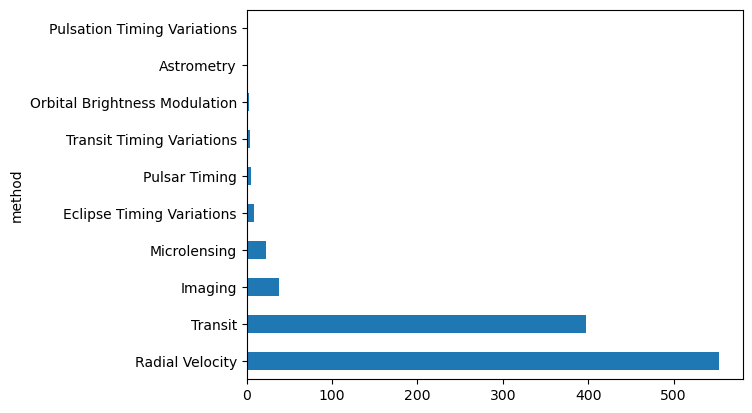

In [100]:
df.select_dtypes(include=["category"]).head()
df.method.unique()
df["method"].value_counts().count()
df["method"].value_counts()
df["method"].value_counts().plot.barh();

<hr style="border: 1px solid blue;">

## Sürekli Değişkenlerin Özeti
* Sürekli değişkenleri şu şekilde seçebiliriz:
  > df.select_dtypes(include=["int64", "float64"])
* Hatırlarsak sürekli değişkenlerin betimsel istatistiklerine ulaşmak için:
  > df.describe()

In [111]:
df.select_dtypes(include=["int64", "float64"])
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


<hr style="border: 4px solid red;">

# **Dağılım Grafikleri**
## **Barplot**
* Sütun grafik tekniğidir.
* Elimizdeki **kategorik** değişkenleri görselleştirmek için kullanılır.
>
* Önceki veri setini değil de başka bir veri setini kullanacağız: Diamond
* Diamond verisinin hikayesi:
  > carat: Ağırlık <br>
  > cut: Kalite <br>
  > color: Renk -> from J(worst) to D(best) <br>
  > clarity: temizliği, berraklığı <br>
  > price: Dolar cinsinden fiyat <br>
  > x: length in mm <br>
  > y: width in mm <br>
  > z: depth in mm <br>
  > depth: toplam derinlik yüzdesi



In [436]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head(10)

#df.info()
#df.describe()
df["cut"].value_counts()
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

***
* Elimizde veride nominal değil ordinal bir sıralama var. Mesela 'color' ve 'cut' değişkeni harflerle bir kaliteyi temsil ediyor ama bunu python anlamaz o yüzden bunu belirtmemiz lazım: **(Ordinal Tanımlama)**
  > from pandas.api.types import CategoricalDtype <br>
    cut_categories = ["Fair","Good","Very Good","Premium","Ideal"] <br>
    df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True)) <br>

In [173]:
from pandas.api.types import CategoricalDtype
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True)).head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

***
**Sütun grafiğinin oluşturulması:**
* Pandas:
  > * df["cut"].value_counts().plot.barh()
  >> İstersek başlık da ekleyebiliriz: df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları")

* Seaborn:
  > sns.barplot(x="cut" , y=df.cut.index , data=df)

<Axes: xlabel='cut', ylabel='None'>

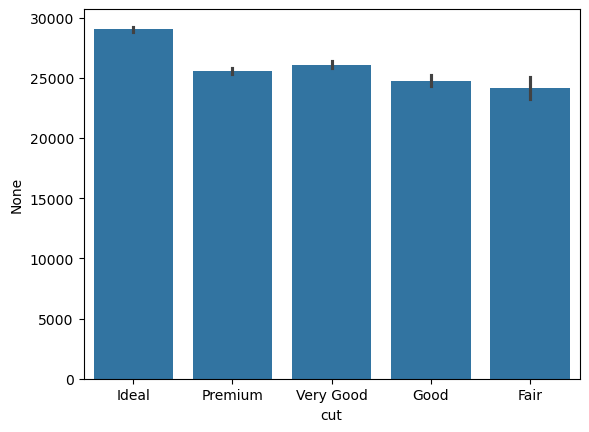

In [170]:
#df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları")
sns.barplot(x="cut" , y=df.cut.index , data=df)

<hr style="border: 1px solid blue;">

## **Sütun Grafik Çaprazlamalar**
* Çaprazlama, veri seti içerisinde yer alan değişkenlerin birlikte değerlendirilmesi yani kırılımların göz önünde bulundurulmasını sağlar
* Çaprazlama, Kırılım, Boyut Ekleme aynı şey demektir.
* 'cut' kategorik değişkenini dönüştürmüştük
* Şimdi bu 'cut' kategorik değişkeni ile 'price' sayısal değişkenini çaprazlayarak, bir arada görselleştirerek çaprazlaştırma işini yapalım: Burada '**Cat**egorik **Plot**' kullanacağız catplot()
  > sns.catplot(x="cut", y="price", data=df)

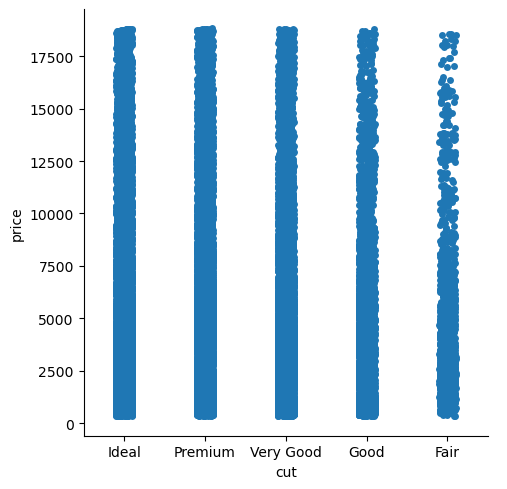

In [193]:
sns.catplot(x="cut", y="price", data=df)

***
* Şimdi bu yukarıdaki grafiğe bir boyut daha ekleyebiliriz mesela 'color' gibi:
  > sns.barplot(x="cut", y="price", hue="color")
* Yukarıdaki grafikte 'price' 0dan 17500e kadar bir aralığa sahipken bu yaptığımız yeni grafik 0dan 6000e kadar gidiyor, neden?
  > * Seaborn, biz 3. boyutu eklediğimizde bunu teknik olarak bir arada göstermek sütun grafiği ile pek mümkün olmayacağı için  arka tarafta kendisi veriyi temsil edecek bir değer oluşturup buna göre bir yansıtma yaptı. Yani aşağıdaki 'price' değişkeninin değeri: **İki kategorik değişken bir arada bulunduğunda, price değişkeninin ortalaması.**
  > * Üzerine koyulan çubuklar ise Standart Sapma değerleri.

* Peki bunu nasıl doğrularız:
  > df.groupby(["cut", "color"])["price"].mean() ->  Önce 'cut'a göre kır(grupla), sonra 'color'a göre kır(grupla) ve bunun neticesinde de 'price' değerine göre bir ortalama işlemi yap

* Yani barplot fonksiyonu ile 'hue' aracılığıyla 3. boyutu eklediğimizde, y ekseni bozulmuş gibi gözükse de aslında boyutlar arasındaki değişkenliği/durumu belli etmek için bir toplulaştırma/temsil işlemi yapılmıştır 

/var/folders/8t/_v6tn9mj28d6v4qkjfcq5phw0000gn/T/ipykernel_24423/2735265657.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut", "color"])["price"].mean()


cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

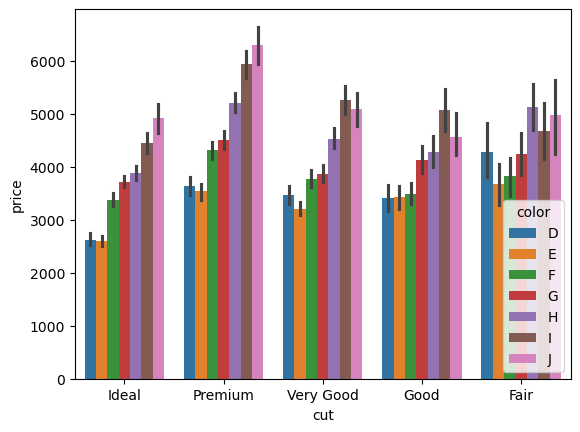

In [203]:
sns.barplot(x="cut", y="price", hue="color", data=df)
df.groupby(["cut", "color"])["price"].mean()  #Doğrulama

<hr style="border: 1px solid red;">

## **Histogram ve Yoğunluk Grafikleri**
* Histogram ve Yoğunluk Grafikleri, **sayısal(sürekli) değişkenlerin** dağılımını ifade etmek için kullanılan veri görselleştirmedir.
* Yine bunun için Diamonds verisini kullanacağız. Bunun içerisindeki 'price' değişkenine odaklanacağız
* Burada 'histplot' fonksiyonunu kullanacağız
  > (Görselleştirmek istediğimiz değişken, kde(Yoğunluk fonksiyonu da grafik üzerine kunulsun mu?) = False)
  >> kde(Kernel Density Estimate)=False yazmasak da olur çünkü kendisi zaten default olarak False tanımlanır.
  > bins = 1000: Grafikteki çubuk sayısını belirtir
* Histogramın çalıştırılma mantığı nedir?
  > Histogram, elimizdeki sayısal değişkenlerin değerlerini belirli aralıklara böler ve o belirli aralıktaki gözlemlerin frekansını yansıtır.
* İstersek üzerine yoğunluk grafiğini de ekleyebiliriz: Bunun için 'kde'yi True yapmamız lazım, default olarak kendisi False
  > sns.histplot(df.price);
* Eğer sadece 'Yoğunluk' grafiğini görmek istiyorsak 'histogramı' False yapmamız lazım: Kernel Density Estimate
  > sns.kdeplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

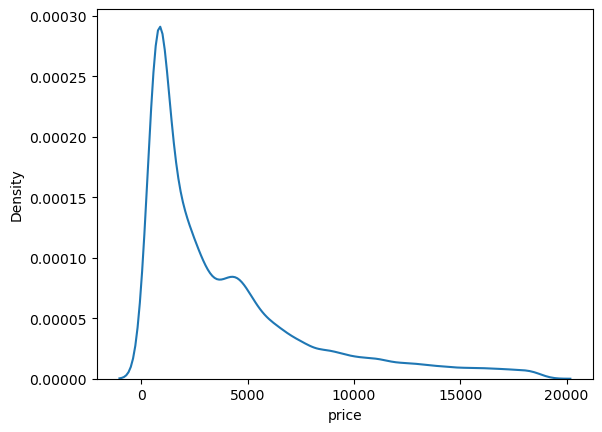

In [274]:
#sns.histplot(df.price);
#sns.histplot(df.price, kde=True);
#sns.histplot(df.price,hist=False)
sns.kdeplot(df.price)

<hr style="border: 1px solid blue;">

### **Histogram ve Yoğunluk Çaprazlamalar**
* Burada 'FacetGrid' adında bir fonksiyon kullanacağız. Bu, grafik üzerine eklenen boyutları bölerek göstermek için kullanılır.
* Aşağıda yapacağımız işlem: 'price'a göre bir kdeplot(Yoğunluk) grafiği oluşturacağız fakat bunu FaceGrid fonksiyonu ile tüm 'cut' sınıflarıyla map'lemiş olacağız:
  > (sns
     .FacetGrid(df, hue = "cut", height=5, xlim=(0,10000))
     .map(sns.kdeplot, "price", shade=True)
     .add_legend()
    )
  >> hue: Boyut ekleme <br>
  >> xlim, ylim = x ve y eksen limitleri<br>
  >> add_legend(): 'cut' kategorik değişkeninin değerlerini grafiğin yanına isimler tablosu eklemek için kullandık

***

<div style="background-color:yellow; padding:10px; border-radius:5px;">
    ‼️ Normalde bir sayısal değişkenin dağılımının normal dağılım olmasını bekleriz. Yani bir tepe olmasını ve kenarlara doğru alçalmasını bekleriz.
    <br>
    Ama eğer birden fazla tepe varsa genelde şu anlama gelir: Odaklanılan sayısal değişkenin içerisindeki bilgiyi/yapıyı oluşturan <strong>birden fazla faktör</strong> var demektir

</div>

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

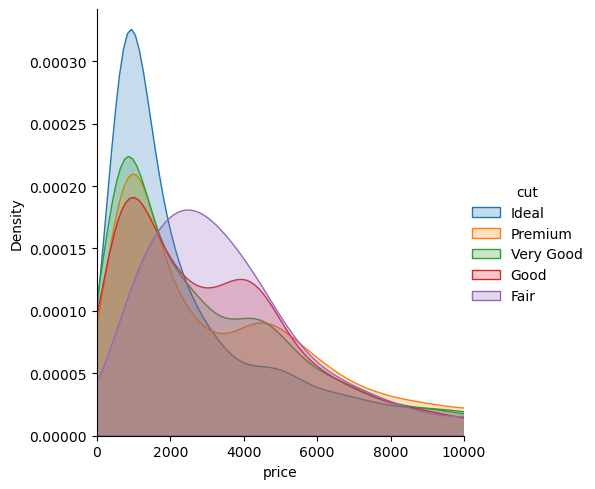

In [442]:
(sns
 .FacetGrid(df, hue = "cut", height=5, xlim=(0,10000))
 .map(sns.kdeplot, "price", shade=True)
 .add_legend()
)

*** 
* Şimdi başka bir çaprazlama örneği daha verelim:
* sns.catplot(x="cut", y="price", hue="color", kind="point", data=df)
  > kind: Grafik gösterim türünü ifade eder, point ile noktalı gösterim oluşacak

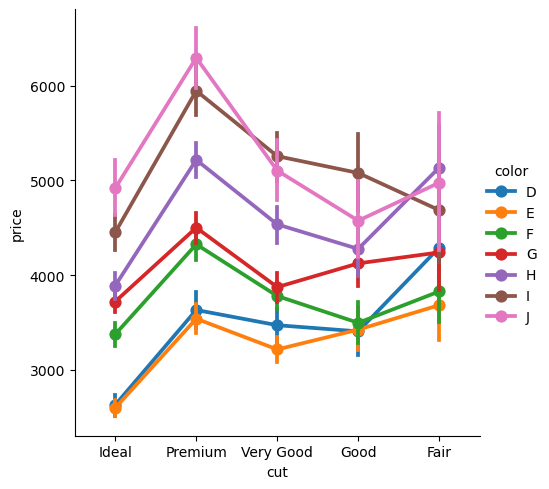

In [322]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df)

<hr style="border: 1px solid red;">

## **Kutu Grafik (Boxplot)**
* Box Plot'da yine histogram gibi elimizdeki sayısal(sürekli) değişkenleri görselleştirmek için çok sık kullandığımız bir yöntemdir.
* Bu grafik türünü başka bir veri örneği üzerinden anlatacağız: 'tips'
  > total_bill: Yemeğin toplam fiyatı(Tips and taxes included) <br>
  > smoker: Grupta sigara içen var mı?<br>
  > time: Ne zaman(0=Day, 1=Night)<br>
  > size: Gruptaki kişi sayısı<br>

In [449]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head(10)

#df.describe().T
#df["sex"].value_counts()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


***
* Elimizdeki verinin hikayesine baktığımıza göre şimdi Box Plot'a yoğunlaşabiliriz
* Box Plot bize sadece veri hakkındaki minimum ve maksimum değeri vermekle kalmaz. Onun en iyi yanı **'Aykırı Değerleri'** bize veriyor olması
  > sns.boxplot(x= df["total_bill"])
  > İstersek dikey şekilde de bastırabiliriz: sns.boxplot(x= df["total_bill"], orient="v")

<Axes: xlabel='total_bill'>

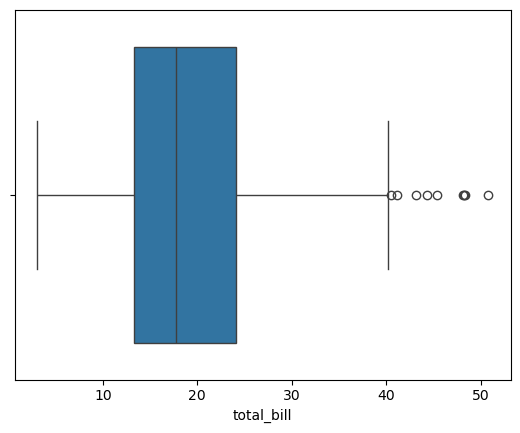

In [498]:
sns.boxplot(x= df["total_bill"])

<hr style="border: 1px solid blue;">

### **Box Plot Çaprazlamalar**
* Hangi günler daha fazla kazanıyoruz?
  > sns.boxplot(x="day", y="tip", data=df)
* Sabah mı yoksa akşam mı daha çok para kazanıyoruz?
  > sns.boxplot(x="time", y="tip", data=df)
* Yemeğe gelen kişi sayısı ile total hesap orantılı mı?
  > sns.boxplot(x="size", y="total_bill", data=df)
* Yemeğe gelen kişi sayısı ve cinsiyet ile total hesap arasındaki bağ mı?
  > sns.boxplot(x="size", y="total_bill", hue="sex", data=df)

<Axes: xlabel='size', ylabel='total_bill'>

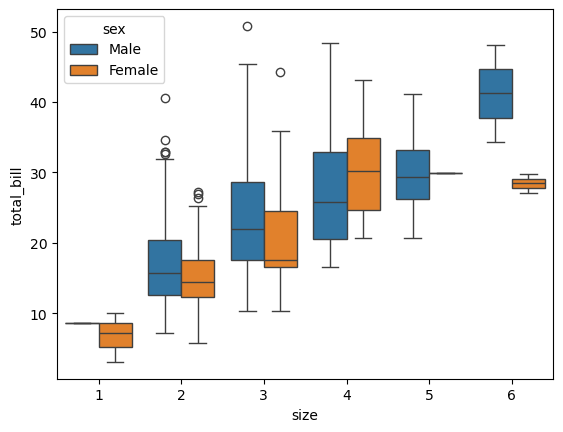

In [521]:
#sns.boxplot(x="day", y="tip", data=df)
#sns.boxplot(x="time", y="tip", data=df)
#sns.boxplot(x="size", y="total_bill", data=df)
sns.boxplot(x="size", y="total_bill", hue="sex", data=df)

<hr style="border: 1px solid red;">

## Violin Plot
* Box Plot'a benzerdir, bize biraz daha dağılım anlamında bilgi sunar. **Yoğunluk(kde) grafiği ile kutu(box) grafiğinin kesişimi** gibi düşünülebilir.
* Burada da **catplot()** methodu kullanılır; 'kind' parametresi ile oluşturulur
* Öncesine ele aldığımız Histogram ve Box Plot mutlaka görselleştirmede kullanılmalı, Violin plot böyle biraz daha tercih meselesi.
* Verimiz yine önceki 'tips' verisi:
  > sns.catplot(y="total_bill", kind="violin", data=df)

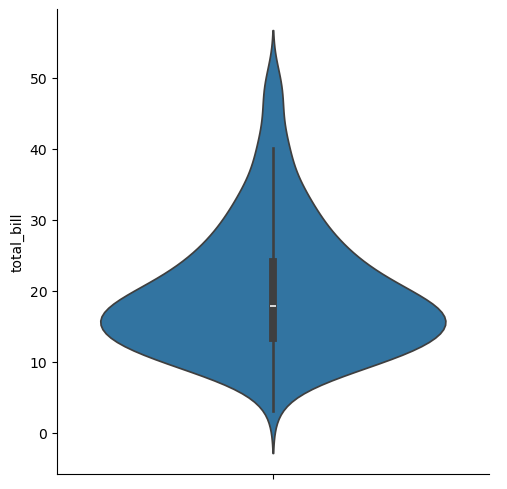

In [526]:
sns.catplot(y="total_bill", kind="violin", data=df)

<hr style="border: 1px solid blue;">

### Vilon Plot Çaprazlamalar
* sns.catplot(x="day", y="tip", kind="violin", data=df)

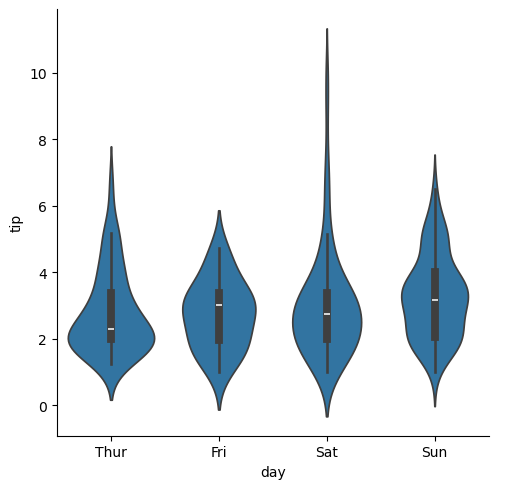

In [530]:
sns.catplot(x="day", y="tip", kind="violin", data=df)